## Import libraries

In [116]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
import seaborn as sns

## Split data for train and test

In [117]:
df = pd.read_csv('Explored.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
y = df['Churn Value']
X = df.drop('Churn Value', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Initialize models and fit them

In [118]:
models = [
    ('Random Forest', RandomForestClassifier(random_state=42, max_depth=10, n_estimators=100)),
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced', C=10)), 
    ('Logistic Regression', LogisticRegression(random_state=42, max_iter=10000)), 
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5, weights='distance')),
    ('XG Boost', XGBClassifier(random_state=42, n_estimators=100, max_depth=4)), 
     ('Catboost', CatBoostClassifier(random_state=42, n_estimators=100, depth=4, verbose=False)),
     ('LightGBM', LGBMClassifier(random_state=42, n_estimators=100, max_depth=4, verbose=-1))
]

In [119]:
model_scores = []
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred)
    model_scores.append({'Model': model_name, 'F1-score': score})
scores_df = pd.DataFrame(model_scores)

## Visualize results

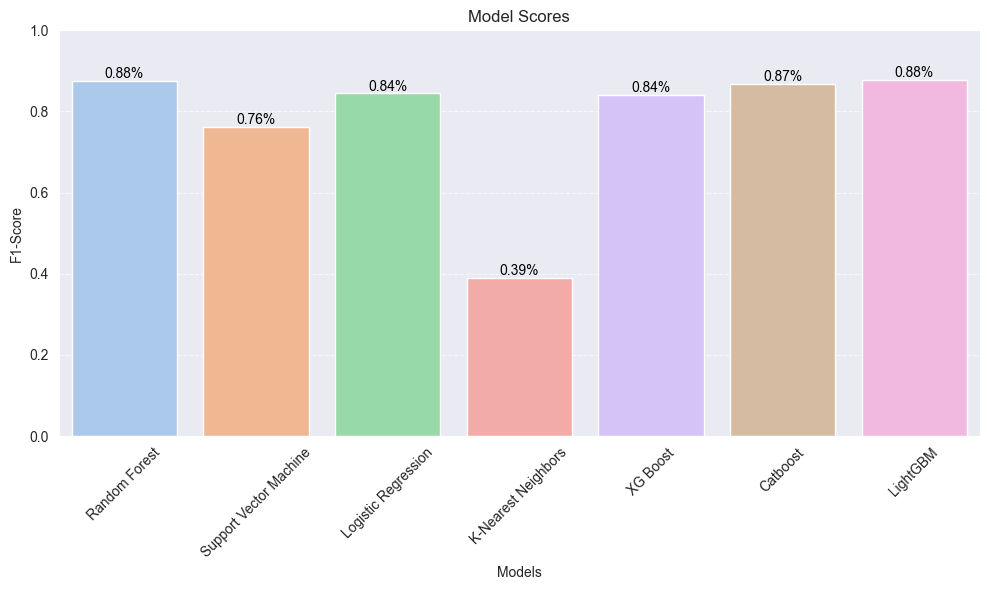

In [120]:
colors = sns.color_palette('pastel', n_colors=len(scores_df))

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='F1-score', data=scores_df, palette=colors, hue='Model', legend=False)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## I will use RandomForest, Catboost, LightGBM to optimize hyperparameters